Inferential statistic ANOVA
=======

In [2]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [3]:
# Path to the file to be imported
path = "../Modelab-Python/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
co2_data = import_csv(path)

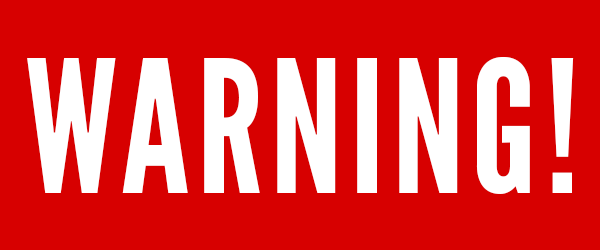

Beware! the data are not normal. This exercise is only an example

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def two_way_anova_tukey(df, response, factor1, factor2, alpha=0.05):
    """
    Performs a two-way ANOVA and Tukey HSD post-hoc test if significant effects are found.

    Parameters:
    - df (DataFrame): The dataset.
    - response (str): Dependent variable column.
    - factor1 (str): First independent variable column.
    - factor2 (str): Second independent variable column.
    - alpha (float): Significance level (default = 0.05).
    """
    # Fit the two-way ANOVA model and generate the ANOVA table
    model = ols(f'{response} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA Results:\n", anova_table)

    # Run Tukey HSD post-hoc test if significant effects are found
    if (anova_table['PR(>F)'] < alpha).any():
        print("\nSignificant effects detected. Running Tukey HSD post-hoc test:")
        df['Group'] = df[factor1].astype(str) + " - " + df[factor2].astype(str)
        tukey = pairwise_tukeyhsd(df[response], df['Group'], alpha=alpha)
        print(tukey.summary())
    else:
        print("\nNo significant effects detected. Post-hoc test is not required.")

In [5]:
two_way_anova_tukey(co2_data, response="ta_micromol_kg", factor1="season", factor2="estuary")


ANOVA Results:
                             sum_sq     df          F        PR(>F)
C(season)             7.234655e+06    1.0  45.502782  9.393830e-10
C(estuary)            9.238908e+03    1.0   0.058109  8.099945e-01
C(season):C(estuary)  8.689347e+03    1.0   0.054652  8.156259e-01
Residual              1.621735e+07  102.0        NaN           NaN

Significant effects detected. Running Tukey HSD post-hoc test:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------------
  Dry - Candelaria     Dry - Palizada   31.1111 0.9874 -214.3649  276.5871  False
  Dry - Candelaria Rainy - Candelaria -539.7153 0.0001  -852.637 -226.7935   True
  Dry - Candelaria   Rainy - Palizada -547.4444    0.0   -848.09 -246.7989   True
    Dry - Palizada Rainy - Candelaria -570.8264    0.0 -883.7482 -257.9046   True
    Dry - 